### Lesson Overview

In this lesson, you'll be building a Streamlit application to generate meme images with the fine-tuned Stable Diffusion model from the previous lesson.  Unlike in previous, in this lesson, you won't be working in this notebook.  All of the tasks (except the first) will done on the Terminal command line or in a PY file Python file.  We'll use these icons on each task as a reminder.

This notebook exists to have these instructions, the videos, and some test code for each task.  This code should be run _after_ you have completed the task.  If it runs successfully, you've probably done the task correctly.  If it doesn't, you'll need to do some more work.  That work needs to be done on the command line or in the Python file.  Don't edit the notebook to get things working!

We have a couple of things to import for the testing code.  We're also turning on import reloading, so the notebook stays up to date with the code in the Python file you'll create.

In [1]:
%load_ext autoreload
%autoreload all

import os

import requests
from IPython.display import display

### Getting Set Up

Our goal is to build a streamlit app.  In addition to the Python file, we'll need a file to track requirements and a font file.  We also want to track our progress in git.  To keep all of this contained, we'll do this work in a sub-directory.

**Task 6.4.1:** Create a new directory called `meme_app`.  It should be within the directory containing this notebook.  (You could do this through the terminal, but it's easier to use the file browser within JupyterLab.)

In [2]:
# Use the file browser within JupyterLab to create a new directory called meme_app
# Or you can also use the terminal to create the directory with the command: mkdir meme_app

Once you've done so, run the cell below.  It'll change things so that all future commands in this notebook run within this directory.  If it gives you a `FileNotFoundError`, the directory hasn't been created correctly.

In [3]:
os.chdir("meme_app")

<div class="alert alert-info" role="alert">
If you restart this notebook, be sure the rerun this cell!
</div>

**Task 6.4.2:** Terminal Configure git by running each of the following commands in the terminal.  You can open a terminal with _File_ > _New_ > _Terminal_.

```bash
git config --global user.name "Your Name"

git config --global user.email "your@email.com"

git config --global init.defaultBranch main
```
After running these, you should see this information within the output of the following cell.

In [4]:
!git config --global --list

user.name=freshiwe
user.email=muadh4success@gmail.com
init.defaultbranch=main


**Task 6.4.3:** Terminal Initialize a git repository in the `meme_app` directory.

Don't try to do this from within the notebook.  Instead, within a terminal navigate to the `meme_app` directory with the `cd` command.  The following cell will print the full path to this directory, which you may find helpful.

In [5]:
print(os.path.abspath(os.path.curdir))

/app/meme_app


Then run the appropriate `git` command to initialize a git repository.

The following command should output "No commits yet", along with other information.

In [6]:
!git status

On branch main

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	__pycache__/
	app.py

nothing added to commit but untracked files present (use "git add" to track)


**Task 6.4.4:** PY file Create a Python file called `app.py` in the `meme_app` directory.  Edit it to import `torch`.  Set a `device` variable to "cuda" if a GPU is available or "cpu" if one is not.  Set a `dtype` variable to `torch.float16` if a GPU is available or `torch.float32` if one is not.

This cell should print out "cuda with torch.float16" if everything is working correctly.

In [7]:
import app

print(f"{app.device} with {app.dtype}")

cuda with torch.float16


### Stable Diffusion Code

**Task 6.4.5:** PY file Create a function `load_model()`.  It should load the Stable Diffusion v1.4 model from Hugging Face and place it on the correct device.  It should return the Stable Diffusion pipeline that gets created.

In [8]:
pipeline = app.load_model()

print(pipeline)

Couldn't connect to the Hub: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/models/CompVis/stable-diffusion-v1-4 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x76a6af946590>: Failed to resolve \'huggingface.co\' ([Errno -3] Temporary failure in name resolution)"))'), '(Request ID: 626a8299-55e8-4341-9f23-c48dce451647)').
Will try to load from local cache.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



**Task 6.4.6:** PY file Change the code to load the LoRA weights located in `"rschroll/maya_model_v1_lora"`. Use that inside of the `load_model` function to load the LoRA weights from Hugging Face.

<div class="alert alert-info" role="alert">
    <p><b>Changes with respect to the video</b></p>
<p>The previous lesson used to push the weigths to HuggingFace. But due to changes to their APIs, we've removed that section. Instead, the weights are provided already.</p>
</div>

Try it by yourself:

In [9]:
del pipeline
lora_pipeline = app.load_model()

print(lora_pipeline)

Couldn't connect to the Hub: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/models/CompVis/stable-diffusion-v1-4 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x76a6adb16410>: Failed to resolve \'huggingface.co\' ([Errno -3] Temporary failure in name resolution)"))'), '(Request ID: 5c5d7a03-8945-46ea-bb9a-5bdf975af423)').
Will try to load from local cache.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



Great progress so far!  To make sure we don't lose any of it, let's commit what we have to git.

**Task 6.4.7:** Terminal Add `app.py` to the git staging area and then make a commit.

The cell below should print out the details of your commit.

In [ ]:
!git log

**Task 6.4.8:** PY file Create a function `generate_images(prompt, pipeline, n)`.  It should take three arguments:
- `prompt`: A image generation prompt, as a string.
- `pipeline`: A Stable Diffusion pipeline object.
- `n`: The number of images to create, as an integer.

It should return a list of PIL Images of length `n`.

The following cell will test that this works.

  0%|          | 0/50 [00:00<?, ?it/s]

1


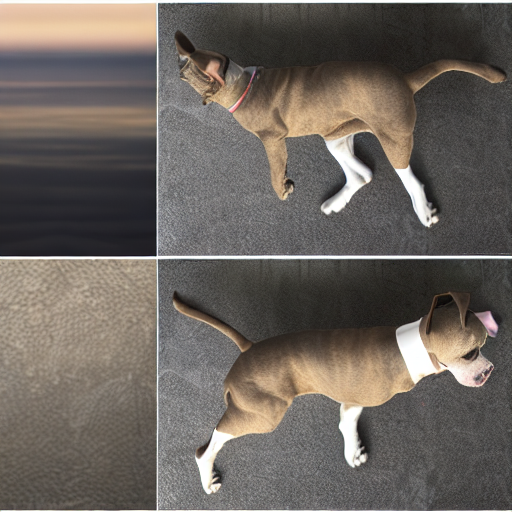

In [11]:
images = app.generate_images("My dog Maya generates a Streamlit app.", lora_pipeline, 1)

print(len(images))
images[0]

That may not have been a lot of code, but it's a new feature.  That's worth a git commit!

**Task 6.4.9:** Terminal Add and commit the changes to `app.py` to the git repository.

You should now see two commits.

In [ ]:
!git log

### Creating Meme Images

To make memorable memes, we want to add some text to these images.  The following function uses the PIL library to superimpose text on an image:

```python
from PIL import ImageDraw, ImageFont

def add_text_to_image(image, text, text_color="white", outline_color="black",
                      font_size=50, border_width=2, font_path="arial.ttf"):
    # Initialization
    font = ImageFont.truetype(font_path, size=font_size)
    draw = ImageDraw.Draw(image)
    width, height = image.size

    # Calculate the size of the text
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Calculate the position at which to draw the text to center it
    x = (width - text_width) / 2
    y = (height - text_height) / 2

    # Draw text
    draw.text((x, y), text, font=font, fill=text_color,
              stroke_width=border_width, stroke_fill=outline_color)
```

Note that this code _mutates_ its first argument, and so the function doesn't have a return argument.

This function requires a font file to work.  The cell below copies `arial.ttf` into the `meme_app` directory.  Make sure to run it now.

In [12]:
!cp ../arial.ttf ./

**Task 6.4.10:** PY file Add the `add_text_to_image` function to `app.py`.

This cell will try out the function.

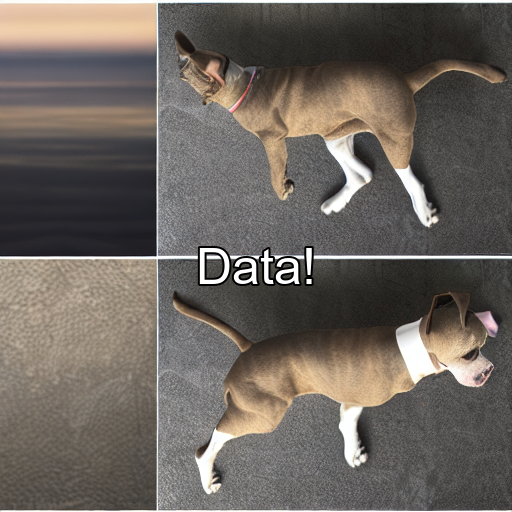

In [13]:
image = images[0].copy()  # Avoid mutating the original image
app.add_text_to_image(image, "Data!")

image

**Task 6.4.11:** PY file Create a function `generate_memes(prompt, text, pipeline, n)`.  It should take as arguments:
- `prompt`: A image generation prompt, as a string.
- `text`: The text to superimpose on the images, as a string.
- `pipeline`: A Stable Diffusion pipeline object.
- `n`: The number of images to create, as an integer.

It should generate `n` images from the `prompt`, add the `text` to each one, and return a list of PIL Images.

In [14]:
images = app.generate_memes(
    "My dog Maya has all the memes.", "Maya has a meme!", lora_pipeline, 2
)

for image in images:
    display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 256.00 MiB. GPU 0 has a total capacity of 14.57 GiB of which 6.75 MiB is free. Including non-PyTorch memory, this process has 0 bytes memory in use. Of the allocated memory 3.03 GiB is allocated by PyTorch, and 189.58 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

That should be everything we need to create the images.  Let's commit!

**Task 6.4.12:** Terminal Add and commit your changes.  Remember to include `arial.ttf`!

In [ ]:
!git log

### Building a Streamlit App

We're now ready to build a Streamlit app to let people generate meme images of their own.  We'll do this in three steps:
- First, we'll set up the inputs.  Users should be able to specify the number images, the prompt, and the text to place over the images.
- Second, we'll set up some logic so that we only try to generate images once all of the inputs are ready.  (This is computationally expensive, so we don't want to start this until the user has all the inputs correct.)
- Finally, we'll set it to generate the images and display them when ready.

**Task 6.4.13:** PY file Create a Streamlit app that takes the inputs and displays them.  It should look something like this:

<img src="images/streamlit1.png" width="450px">

Do this by making a function called `main()`.  Inside, construct the Streamlit components you need.  You'll probably find [`st.sidebar`](https://docs.streamlit.io/develop/api-reference/layout/st.sidebar), [`st.number_input()`](https://docs.streamlit.io/develop/api-reference/widgets/st.number_input), and [`st.text_area()`](https://docs.streamlit.io/develop/api-reference/widgets/st.text_area) useful.

At the end of `app.py`, add
```python
if __name__ == '__main__':
    main()
```
Then you should be able to launch the app from the command line with

```bash
streamlit run app.py --browser.serverAddress 0.0.0.0 --server.port 9000
```

Now that the app is running, switch your view to the tab `Streamlit App`:

<img src="./images/streamlit-view-switch.png" width="600px">

When the Streamlit app is running, the following cell should be able to connect to it.  (If you're having trouble connecting to the proxy, this is a good way of checking that Streamlit is actually running.)

In [ ]:
port = 9000
resp = requests.get(f"http://localhost:{port}", timeout=5)
if resp.ok:
    print("Streamlit server responded")
else:
    print(f"Error connecting to server: {resp.reason}")

If you like, you can leave the Streamlit server running for the next few steps.  Or you can shut it down and restart it as you need it.

**Task 6.4.14:** PY file Add a "Generate Images" button to the sidebar.  When clicked, it should display an error if either the prompt or text are empty.  Otherwise, it should display the same message as before.  You'll probably want [`st.button`](https://docs.streamlit.io/develop/api-reference/widgets/st.button), which returns `True` when pressed and `False` otherwise.

<img src="images/streamlit2.gif" width="450px">

There's no automatic test for this behavior.  It's up to you to judge if it's working!

**Task 6.4.15:** PY file Actually generate and display the images when the "Generate Images" button is clicked.

You'll need to both load the Stable Diffusion model and generate the images, before displaying them with [`st.image`](https://docs.streamlit.io/develop/api-reference/media/st.image).  This will take a long time, so to give the user feedback, add a [spinner](https://docs.streamlit.io/develop/api-reference/status/st.spinner):
```python
with st.spinner("Message"):
    # Long-running code goes here
```
This will display a spinner, along with your message, while the code is running.  When it completes, the spinner will be replaced by any components created inside of the `with` block.

Congrats&mdash;you have a working app!  Let's get it committed.

**Task 6.4.16:** Terminal Commit the changes to git.

In [ ]:
!git log

You've probably noticed that the image generation takes a long time.  Part of this is because the app is reloading the Stable Diffusion model every time it's needed.  This doesn't change, so it'd be better to load it once and reuse it.

We could do this by making the Stable Diffusion pipeline a global object, loading it at startup.  This would help render more quickly, but would cause the app to start very slowly.  Some hosts consider an app that isn't serving within a second or so of start to be broken, and restart it automatically.  So a slow start time is probably unacceptable.

Instead, we can cache the pipeline the first time it's created and reuse it later on.  Luckily for us, Streamlit has the [`@st.cache_resource`](https://docs.streamlit.io/develop/concepts/architecture/caching#stcache_resource) decorator that will do this for us.

**Task 6.4.17:** PY file Add the [`@st.cache_resource`](https://docs.streamlit.io/develop/api-reference/caching-and-state/st.cache_resource) decorator to the definition of `load_model`.

The first time we ask the app to generate some images, it'll take a long time as the model is loaded.  But the following times should be noticeably faster, since the model has been cached.

Right now, we have hard-coded the LoRA weights into `app.py`.  That works fine for now, but it means that we would need to edit the code to change to a different fine-tuning.

Instead, we should load the name of the weights from an environmental variable.  This way, we'll only need to change some configuration settings to switch the fine-tuned model our app uses.

**Task 6.4.18:** Terminal Commit these changes to `app.py`.

In [ ]:
!git log

Congratulations&mdash;you've built a Streamlit app from scratch! That's it! Go back to the left panel to read the conclusion of this project.